In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.patches import Shadow
from matplotlib.lines import Line2D

# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

# 1. Random split

In [2]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2')

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


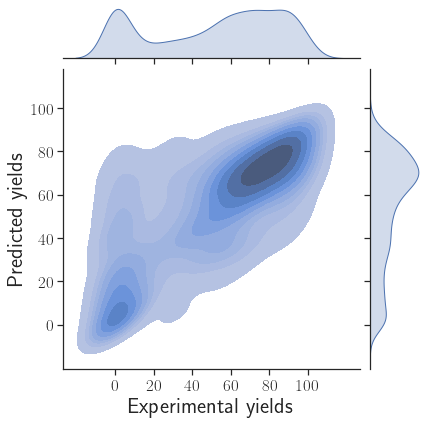

In [3]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
#h.ax_marg_x.set_facecolor("white")
#h.ax_marg_y.set_facecolor("white")

fig_path = 'images/random_split_fp_descriptors_test_size_0.2_full.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

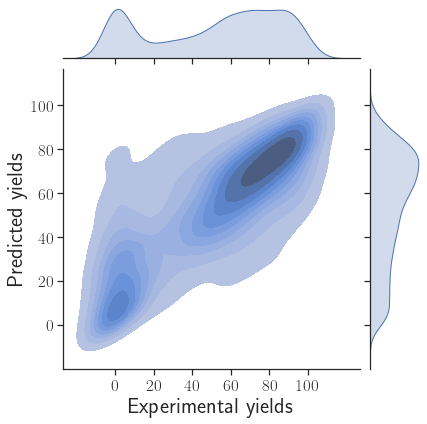

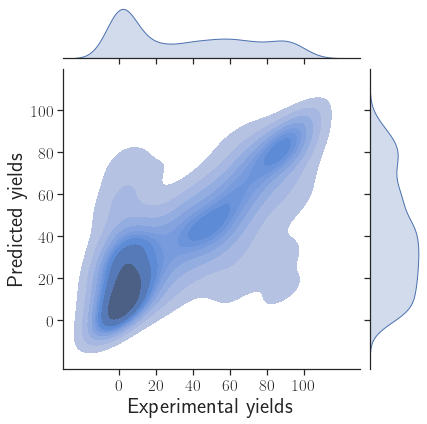

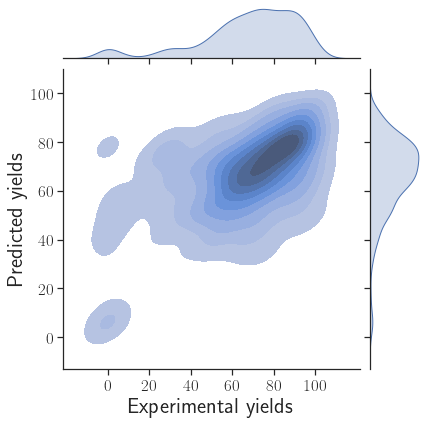

In [5]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_test_size_0.2_full.svg', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_optimisation.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_scope.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

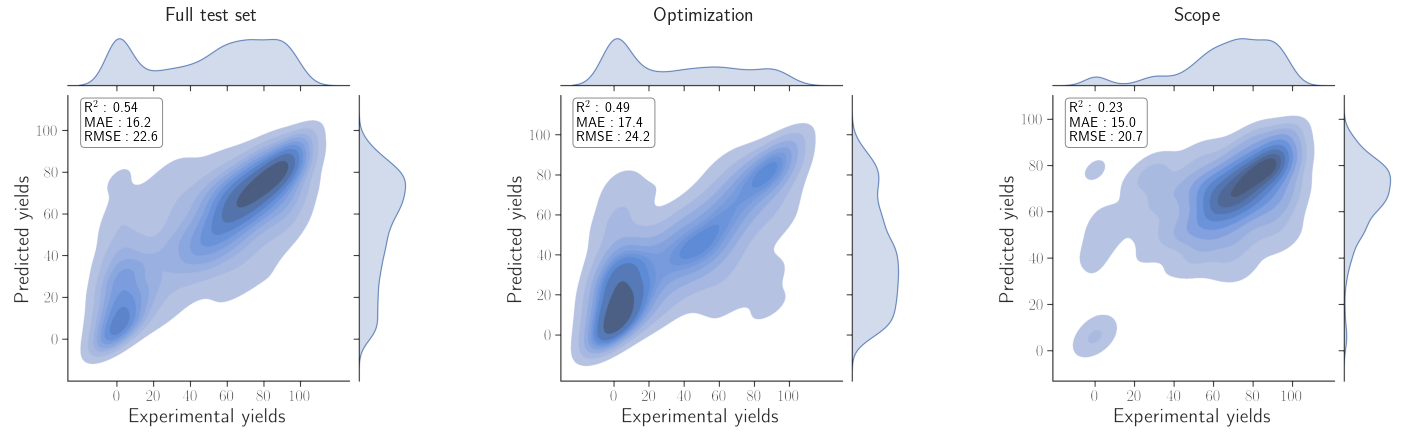

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(340, 500, ' R$^2$      : {:.2f} \n MAE   : {:.1f} \n RMSE : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k" ))

plt.savefig("images/random_split_dft_descriptors_test_size_0.2_scope_opt_full.svg", bbox_inches='tight')

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


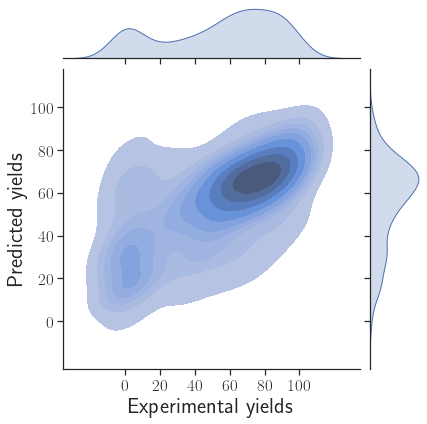

In [8]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_full.png', dpi=300, bbox_inches='tight')

## Comparison of all descriptors performances

In [9]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

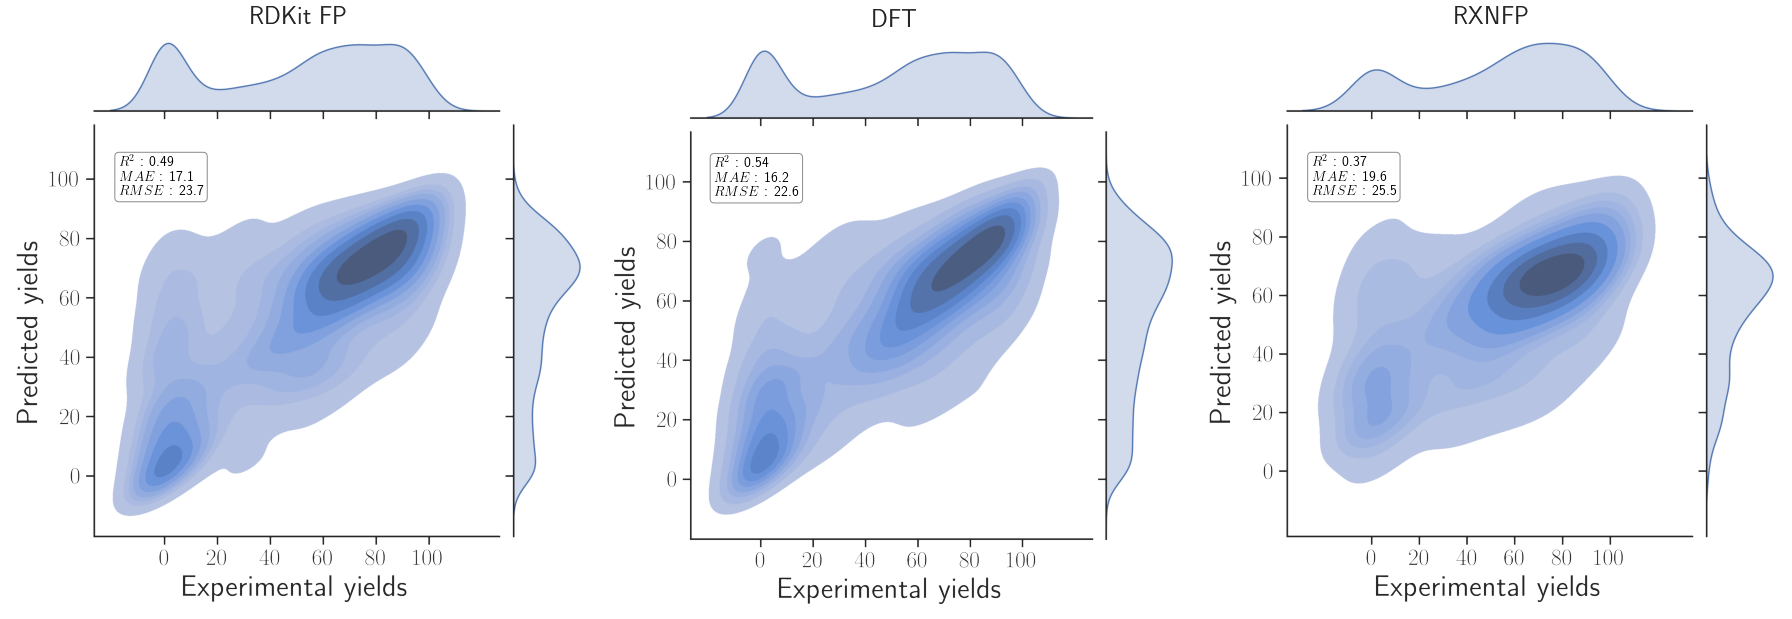

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()    
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', 
                   size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
fig.tight_layout()    
plt.savefig('images/random_split_all_descriptors_test_size_0.2_full.png', dpi=300, bbox_inches='tight')

In [11]:
df_1 = pd.read_csv('results/random_split_dft_descriptors_scope_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_optimisation_test_size_0.2')

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


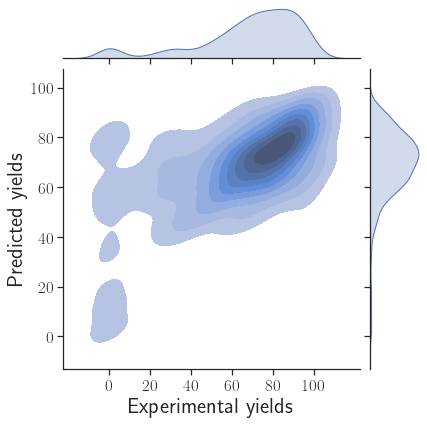

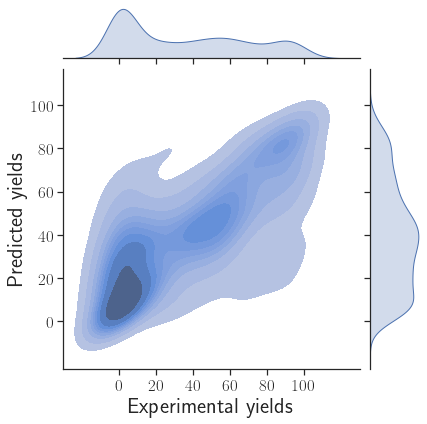

In [12]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_scope_only.png', dpi=300, bbox_inches='tight')

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_optimization_only.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), sharey=True)

origins = ["Scope", "Optimization",]
dfs = [df_1, df_2]
rmse = []
mae = []
r2 = []

rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))
fig_paths.append('images/random_split_dft_descriptors_scope_only.png')

rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))
fig_paths.append('images/random_split_dft_descriptors_optimization_only.png')

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()  
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', 
                   size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
fig.tight_layout()  
plt.savefig('images/random_split_dft_descriptors_optimisation_scope_test_size_0.2.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_dft_descriptors_test_size_0.2_full.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_optimisation.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_scope.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

# 2. Substrate split

In [14]:
df_1 = pd.read_csv('results/substrate_split_fp_descriptors')
df_2 = pd.read_csv('results/substrate_split_dft_descriptors')
df_3 = pd.read_csv('results/substrate_split_rxnfp_descriptors')

## FP descriptors 

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


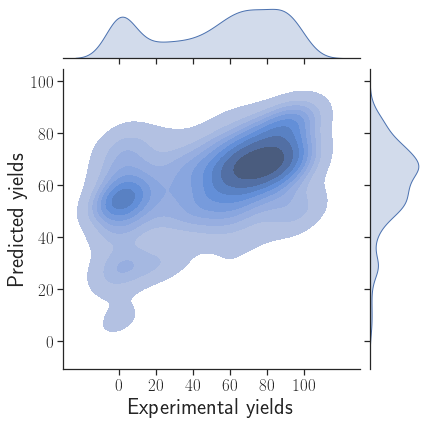

In [10]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

### Comparison of full dataset and scope/optimisation subsets

/opt/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret value `Predicted Yields` for parameter `y`

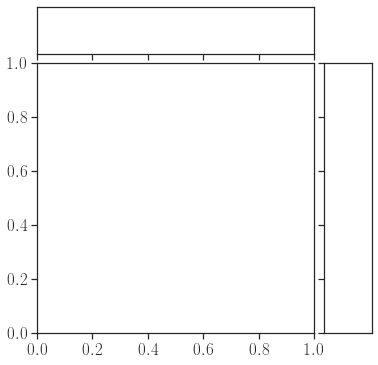

In [11]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('images/substrate_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('images/substrate_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

### Classification task

In [ ]:
rocauc = []
fig_paths = []

predictions = df_1["Predicted Yields"]>50
cm = confusion_matrix(1 * df_1["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_1["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('images/substrate_split_fp_descriptors_full_classification.png', dpi=300)
fig_paths.append('images/substrate_split_fp_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))


predictions = df_2["Predicted Yields"]>50
cm = confusion_matrix(1 * df_2["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_2["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('images/substrate_split_dft_descriptors_full_classification.png', dpi=300)
fig_paths.append('images/substrate_split_dft_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))

predictions = df_3["Predicted Yields"]>50
cm = confusion_matrix(1 * df_3["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_3["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('images/substrate_split_rxnfp_descriptors_full_classification.png', dpi=300)
fig_paths.append('images/substrate_split_rxnfp_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)
origins = ["RDKit FP", "DFT", "RXNFP",]
for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(300, 100, ' $ROC-AUC$      : {:.2f}'.format(rocauc[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('images/substrate_split_all_descriptors_full_classification.png', dpi=300, bbox_inches='tight')

## RXNFP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

# Descriptors Comparison

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]
fig_paths = ['images/substrate_split_fp_descriptors_full.png', 
             'images/substrate_split_dft_descriptors_full.png',
            'images/substrate_split_rxnfp_descriptors_full.png']

r2 = [r2_score(df_1["Yields"], df_1["Predicted Yields"]), 
      r2_score(df_2["Yields"], df_2["Predicted Yields"]),
      r2_score(df_3["Yields"], df_3["Predicted Yields"])]
mae = [mean_absolute_error(df_1["Predicted Yields"], df_1["Yields"]), 
       mean_absolute_error(df_2["Predicted Yields"], df_2["Yields"]),
      mean_absolute_error(df_3["Predicted Yields"], df_3["Yields"])]
rmse = [mean_squared_error(df_1["Predicted Yields"], df_1["Yields"])**0.5, 
       mean_squared_error(df_2["Predicted Yields"], df_2["Yields"])**0.5,
      mean_squared_error(df_3["Predicted Yields"], df_3["Yields"])**0.5]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"), fontsize=25)
    
fig.tight_layout()    
plt.savefig('images/substrate_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

# 3. DOI split

In [ ]:
df_1 = pd.read_csv('results/doi_split_fp_descriptors')
df_2 = pd.read_csv('results/doi_split_dft_descriptors')
df_3 = pd.read_csv('results/doi_split_rxnfp_descriptors')

## FP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h=sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels("Experimental yields", "Predicted yields")
plt.savefig('images/doi_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('images/doi_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h=sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels("Experimental yields", "Predicted yields")
plt.savefig('images/doi_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('images/doi_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

plt.savefig('images/doi_split_dft_descriptors_all.png', dpi=300, bbox_inches='tight')

## RXNFP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('images/doi_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

# 4. Mechanism split

In [ ]:
df_1 = pd.read_csv('results/mechanisms_split_fp_descriptors')
df_2 = pd.read_csv('results/mechanisms_split_dft_descriptors')
df_3 = pd.read_csv('results/mechanisms_split_rxnfp_descriptors')

## FP descriptors

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('images/mechanism_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
plt.savefig('images/mechanism_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('images/mechanism_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))


fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('images/mechanism_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

# 5. Training set size influence 

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)
df_1 = pd.read_csv('results/training_size_influence_fp_descriptors')
df_2 = pd.read_csv('results/training_size_influence_dft_descriptors')
df_3 = pd.read_csv('results/training_size_influence_rxnfp_descriptors')
dfs = [df_1, df_2, df_3]
origins = ["RDKit FP", "DFT", "RXNFP",]
colors = ['b', 'darkorange', 'g']
for i, origin in enumerate(origins):
    ax = axes[i]
    df = dfs[i]
    sizes = df["Sizes"]
    metric_mean = df["Metric mean"]
    metric_lower = df["Metric lower"]
    metric_upper = df["Metric upper"]
    baseline_mean = df["Baseline mean"]
    baseline_lower = df["Baseline lower"]
    baseline_upper = df["Baseline upper"]
    ax.set_title(origins[i], fontsize=22)
    ax.plot(sizes, metric_mean, color= colors[i], label='Predictive performance')
    ax.fill_between(sizes, metric_lower, metric_upper, color = colors[i], alpha=0.5)    
    ax.plot(sizes, baseline_mean, c='r', label='Baseline')
    ax.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.legend(fontsize=22, loc=4)
    ax.set_xlabel("Training set size")
    if i==0:
        ax.set_ylabel("$R^2$", rotation=0)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.grid(True)
    
plt.savefig('images/training_set_size_all_descriptors.png', dpi=300, bbox_inches='tight')

# 6. Restricted chemical space: Suzuki

In [ ]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2_mechanism_suzuki')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2_mechanism_suzuki')

## FP descriptors

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_fp_descriptors_full_mechanism_suzuki.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_full_mechanism_suzuki.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
plt.savefig('images/random_split_dft_descriptors_scope_mechanism_suzuki.png', dpi=300)
fig_paths.append('images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
   

## RXNFP descriptors 

In [ ]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png', dpi=300, bbox_inches='tight')

In [ ]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

plt.savefig('images/meca_restricted_all_descriptors_full.png', dpi=300, bbox_inches='tight')